# Layerwise decoders

These decoders 'straddle' the layers that they decode: randomizing the CLS tokens, passing them through the layer, and decoding the outputs

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns

import numpy as np
import pandas as pd

from tqdm import tqdm

import torch


## Train the straddle models 

In [2]:
from src.model.setup import image_model_setup
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis, _, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis.to('mps')

W0131 22:12:10.722000 68048 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
from src.initialization.activity_dataset import OnlineLayerInputDataset
from src.model.CLS_token_probing import ModuleSpecificDecoder
from src.train.middle_decoders import train_module_decoder


In [4]:
i = 10
layer_name = f'dinov2.encoder.layer.{i}'

ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')

probe = ModuleSpecificDecoder()
base_module = model_analysis.module_dict[layer_name]

model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
model_out.save_pretrained(f'layer{i}_probe')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.755


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.028 >= min_delta = 0.0. New best score: 0.782


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.009 >= min_delta = 0.0. New best score: 0.791
`Trainer.fit` stopped: `max_epochs=3` reached.


In [5]:
for i in [8, 9, 11]:
    layer_name = f'dinov2.encoder.layer.{i}'
    
    ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
    ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')
    
    probe = ModuleSpecificDecoder.from_pretrained('layer10_probe')
    base_module = model_analysis.module_dict[layer_name]
    
    model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
    model_out.save_pretrained(f'layer{i}_probe')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory ./middle_decoders/epli6v8x/checkpoints exists and is not empty.

  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698   

Loading weights from local directory


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.501


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.061 >= min_delta = 0.0. New best score: 0.562


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.013 >= min_delta = 0.0. New best score: 0.575
`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Loading weights from local directory


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.634


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.046 >= min_delta = 0.0. New best score: 0.680


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.008 >= min_delta = 0.0. New best score: 0.688
`Trainer.fit` stopped: `max_epochs=3` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Loading weights from local directory


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.749


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.032 >= min_delta = 0.0. New best score: 0.781


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.014 >= min_delta = 0.0. New best score: 0.795
`Trainer.fit` stopped: `max_epochs=3` reached.


Overall impressions on the validation accuracy
1. The accuracies are quite impressive. Substantially better than the shuffled accuracies previously. This includes the final layer: progressive read-outs don't appear to ever be necessary.
2. Still slight improvements on epoch 3, could certainly train longer for even better performance.

##  Test the straddle models

Notes:
- I saw one case where layers 8 and 10 are correct and the other two are wrong. Does thies happen a lot or is it a mistaken randomization?

#### Debug:

Why are the validation readout different now than previously?

In [2]:
from src.model.setup import image_model_setup
from src.model.CLS_token_probing import ModuleSpecificDecoder
from src.initialization.activity_dataset import OnlineLayerInputDataset

model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis, _, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis.to('mps')

probe = ModuleSpecificDecoder.from_pretrained('layer10_probe')
probe = probe.to('mps')
probe = probe.eval()

W0201 13:01:12.517000 69941 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading weights from local directory


ModuleSpecificDecoder(
  (cls_generator): CLSGenerator(
    (mlp): Sequential(
      (0): Linear(in_features=768, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Linear(in_features=512, out_features=512, bias=True)
      (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=512, out_features=512, bias=True)
      (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_slope=0.01)
      (9): Linear(in_features=512, out_features=768, bias=True)
    )
  )
  (probe): Linear(in_features=768, out_features=1000, bias=True)
  (loss_fn): CrossEntropyLoss()
)

In [3]:
layer_name = 'dinov2.encoder.layer.10'
ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')

In [4]:
val1 = []
val2 = []
labels = []

for batch in tqdm(ds_validation):
    val1.append(probe.forward(batch[0].to('mps'), model.module_dict[layer_name]))
    val2.append(probe.forward(batch[0].to('mps'), model_analysis.module_dict[layer_name]))

    labels.append(batch[1])
    

782it [09:25,  1.38it/s]


In [5]:
val1 = torch.concat(val1)
val2 = torch.concat(val2)
labels = torch.concat(labels)

In [6]:
(val1 == val2).all()

tensor(False, device='mps:0')

In [7]:
torch.isclose(val1, val2).all()

tensor(False, device='mps:0')

In [11]:
(val1.argmax(1).cpu() == labels).float().mean()

tensor(0.7910)

In [12]:
(val2.argmax(1).cpu() == labels).float().mean()

tensor(0.7919)

The difference between these is worth investigating. It is not the _main_ difference that accounts for failures on the probing...

The main difference is that these were trained on the _output_ data rather than input data!

In [2]:
from src.model.setup import image_model_setup
from src.model.CLS_token_probing import ModuleSpecificDecoder
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis, _, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis.to('mps')

W0201 12:45:12.778000 69841 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
readouts = {}
results_val = {'label': []}
results_test = {'label': []}

for i in [8, 9, 10, 11]:
    layer_name = f'dinov2.encoder.layer.{i}'
    probe = ModuleSpecificDecoder.from_pretrained(f'layer{i}_probe')
    probe.eval()

    readouts[layer_name] = probe
    results_val[layer_name] = []
    results_test[layer_name] = []

hooks = model.add_internal_readouts(readouts)

Loading weights from local directory
Loading weights from local directory
Loading weights from local directory
Loading weights from local directory


In [4]:
dl_val = torch.utils.data.DataLoader(image_datasets['validation'], batch_size=64)
dl_test = torch.utils.data.DataLoader(image_datasets['test'], batch_size=64)

In [5]:
def merge_into_storage(storage, batch_outs):
    for name in storage.keys():
        storage[name].append(batch_outs[name])

model.to('mps')

for batch in tqdm(dl_val, total = 50000 / 64):
    _ = model.model( batch['input'].to('mps'))
    outs = model.get_batch_readout()
    outs['label'] = batch['label']
    merge_into_storage(results_val, outs)

for batch in tqdm(dl_test, total = 50000 / 64):
    _ = model.model( batch['input'].to('mps'))
    outs = model.get_batch_readout()
    outs['label'] = batch['label']
    merge_into_storage(results_test, outs)


782it [10:40,  1.22it/s]                                                        
 14%|█████▎                                | 109/781.25 [01:32<09:30,  1.18it/s]


KeyboardInterrupt: 

In [6]:
for key in results_val.keys():
    results_val[key] = torch.concat(results_val[key]).cpu()

In [ ]:
for key in results_test.keys():
    results_test[key] = torch.concat(results_test[key]).cpu()

In [7]:
layers = [f'dinov2.encoder.layer.{i}' for i in range(8, 12)]
val_acc = []
test_acc = []

for layer in layers:
    val_acc.append((results_val[layer].argmax(1).cpu() == results_val['label']).float().mean() )
    #test_acc.append((results_test[layer].argmax(1).cpu() == results_test['label']).float().mean() )



In [8]:
batch['label']

tensor([795, 849, 754, 748, 340, 807, 157, 900, 711, 881, 996, 957, 657,   8,
        130, 747, 108,  46,  51, 263, 432,  94, 669,   2, 221,  59, 721, 508,
        338, 944, 508,  14, 125, 589, 164, 338, 323,  44, 671, 526, 917, 676,
        573, 197, 820, 916, 354, 483, 627, 388, 440,  21, 155, 858, 126, 173,
        616, 468, 980, 294, 137, 427, 288, 779])

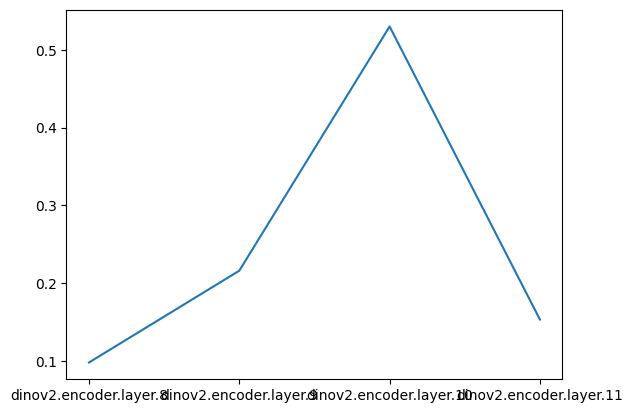

In [9]:
plt.plot(layers, val_acc)

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

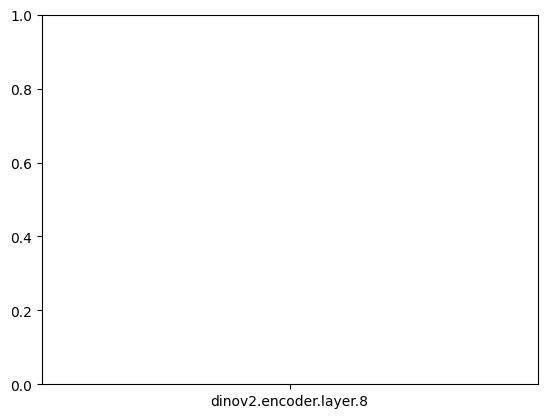

In [10]:
plt.plot(layers, test_acc)